In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv("../dataset/cleanedData.csv")

X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [ ]:
#handling class imlabance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


In [4]:
rf = RandomForestClassifier(random_state=42)

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "class_weight": [None, "balanced"]
}

grid = GridSearchCV(
    rf, param_grid,
    cv=3, scoring="roc_auc", n_jobs=-1, verbose=2
)

grid.fit(X_train_res, y_train_res)

print("Best Parameters:", grid.best_params_)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Parameters: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [5]:
best_rf = grid.best_estimator_

y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:,1]

print("improved random forest")
print("accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print(classification_report(y_test, y_pred))

improved random forest
accuracy: 0.7770193401592719
ROC-AUC: 0.817793918364165
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1291
           1       0.58      0.60      0.59       467

    accuracy                           0.78      1758
   macro avg       0.72      0.72      0.72      1758
weighted avg       0.78      0.78      0.78      1758



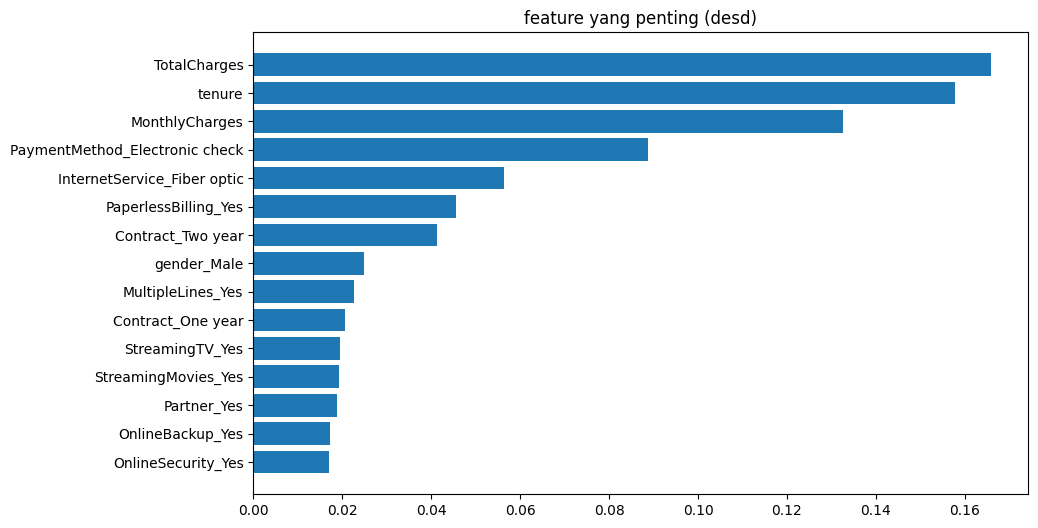

In [7]:
importances = best_rf.feature_importances_
features = X.columns

feat_imp = pd.DataFrame({
    "feature": features,
    "importance": importances
}).sort_values(by="importance", ascending=False)

plt.figure(figsize=(10,6))
plt.barh(feat_imp["feature"][:15], feat_imp["importance"][:15])
plt.gca().invert_yaxis()
plt.title("feature yang penting (desd)")
plt.show()
